## Genera en python una secuencia de 10000 números aleatorios a través del método de congruencia lineal

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Queremos crear la siguiente secuencia de números en python. Para esto vamos a escribir la formula $X_{i+1}=(aX_{i}+c) \mod m$

In [27]:
def secuancia_pseudoaleatoria(x_0,a,c,m,n):
    
    Secuencia=[]
    for i in range(n):
        x_i=((a*x_0+c)%m)
        Secuencia.append(x_i/float(m))
        x_0=x_i
    return Secuencia

##
x_0 = 2020
m = 2**31+3
a = 2**16+1
c = 0
n = 10000

sim_1=secuancia_pseudoaleatoria(x_0,a,c,m,n)


# Create a histogram with more bins for better visualization




### Histograma 

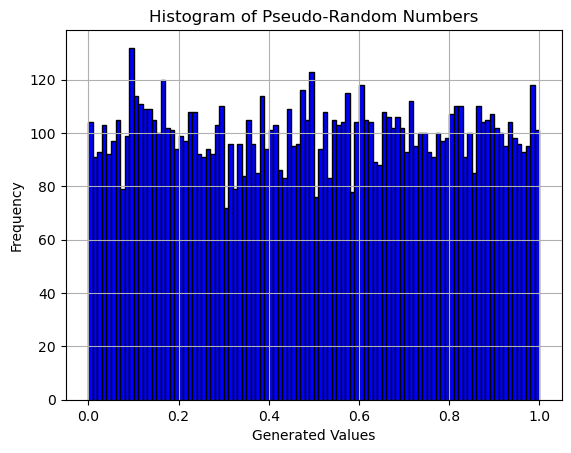

In [29]:
plt.hist(sim_1, bins=100, edgecolor='black', color='blue',range=(0,1))
plt.xlabel('Generated Values')
plt.ylabel('Frequency')
plt.title('Histogram of Pseudo-Random Numbers')
plt.grid(True)
plt.show()
#El autocorrelograma perimite visualizar si los valores se una serie temporal están correlacionados con sus propios valores anteriores en el tiempo.


Vemos que nuestra distribución es muy parecida a una variable uniforme. 

### Autocorrelograma

<Figure size 1000x500 with 0 Axes>

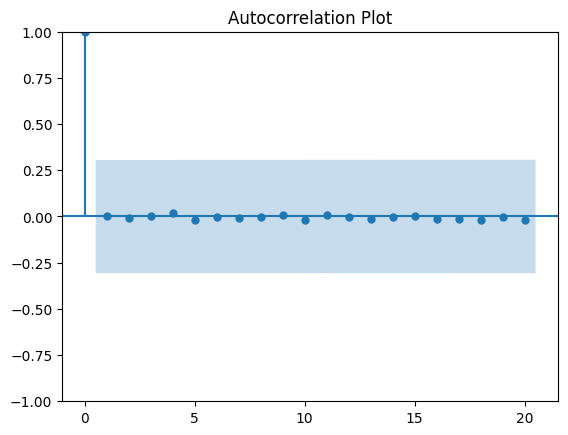

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
autocorrelation = acf(sim_1)

plt.figure(figsize=(10, 5))
sm.graphics.tsa.plot_acf(autocorrelation, lags=20, title='Autocorrelation Plot')
plt.show()

Nuestro autocorrelograma presenta un intervalo de confianza del 95 porciento, mostrando que no existe mucha correlación entre las variables, o que los patrones que siguen no se pueden predecir, esto quiere decir que los datos se ven bastante aleatorios.

## Punto 2

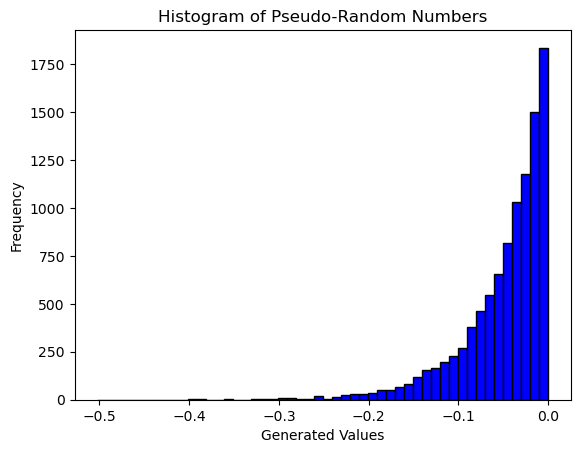

In [60]:
import numpy as np

#a
uniform_variable=np.random.uniform(0,1,10000)
n=10000 # número de variables
x_i=[]
for i in range(n):
    xn=np.log(1-uniform_variable[i])/lambda_param
    x_i.append(xn)  



plt.hist(x_i, bins=50, edgecolor='black', color='blue')
plt.xlabel('Generated Values')
plt.ylabel('Frequency')
plt.title('Histogram of Pseudo-Random Numbers')
plt.show()


<Figure size 1000x500 with 0 Axes>

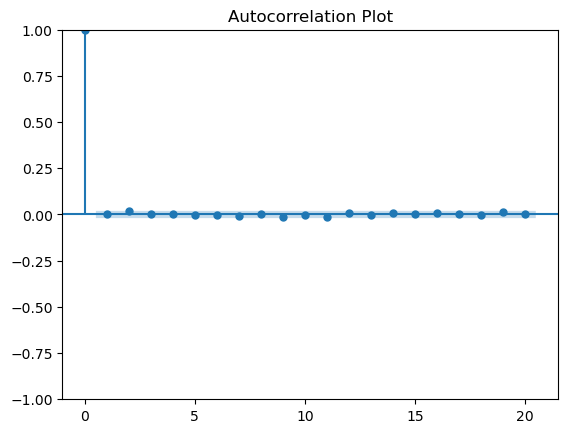

In [61]:

plt.figure(figsize=(10, 5))
sm.graphics.tsa.plot_acf(x_i, lags=20, title='Autocorrelation Plot')
plt.show()

### Punto 3

- Vamos a crear la simulación de las boletas del cine.

Running simulation... 
The average wait time is 41 minutes and 51 seconds.


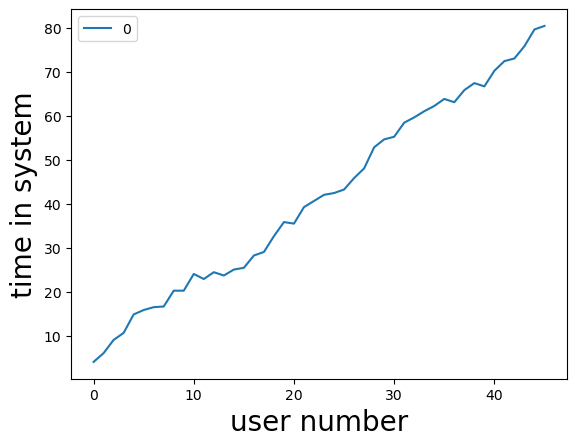

In [75]:
# Adapted from Simpy companion

import simpy
import random
import statistics
import pandas as pd
import matplotlib.pyplot as plt

system_times = []


class Theater(object):
    def __init__(self, env, num_cashiers, num_servers, num_ushers):
        self.env = env
        self.cashier = simpy.Resource(env, num_cashiers)
        self.server = simpy.Resource(env, num_servers)
        self.usher = simpy.Resource(env, num_ushers)

    def purchase_ticket(self, moviegoer):
        yield self.env.timeout(random.randint(1, 3))

    def sell_food(self, moviegoer):
        yield self.env.timeout(random.randint(1, 5))

    def check_ticket(self, moviegoer):
        yield self.env.timeout(3 / 60)

    

def go_to_movies(env, moviegoer, theater):
    # Moviegoer arrives at the theater
    arrival_time = env.now

    with theater.cashier.request() as request:
        yield request
        yield env.process(theater.purchase_ticket(moviegoer))

    if random.choice([True, False]):
        with theater.server.request() as request:
            yield request
            yield env.process(theater.sell_food(moviegoer))

    with theater.usher.request() as request:
        yield request
        yield env.process(theater.check_ticket(moviegoer))

    
    # Moviegoer heads into the theater
    system_times.append(env.now - arrival_time)


def run_theater(env, num_cashiers, num_servers, num_ushers):
    theater = Theater(env, num_cashiers, num_servers, num_ushers)

    for moviegoer in range(3):
        env.process(go_to_movies(env, moviegoer, theater))
        #print("movie goer:",moviegoer)

    while True:
        yield env.timeout(0.20)  # Wait a bit before generating a new person

        moviegoer += 1
        env.process(go_to_movies(env, moviegoer, theater))
        #print("movie goer:",moviegoer)


def get_average_wait_time(wait_times):
    average_wait = statistics.mean(wait_times)
    # Pretty print the results
    minutes, frac_minutes = divmod(average_wait, 1)
    seconds = frac_minutes * 60
    return round(minutes), round(seconds)


def main():
    # Setup

    random.seed(42)
    num_cashiers = 1
    num_servers = 1
    num_ushers = 1

    # Run the simulation
    env = simpy.Environment()
    env.process(run_theater(env, num_cashiers, num_servers, num_ushers))
    env.run(until=90)

    # View the results
    mins, secs = get_average_wait_time(system_times)
    print(
        "Running simulation...",
        f"\nThe average wait time is {mins} minutes and {secs} seconds.",
    )

    # Save the results
    df = pd.DataFrame(system_times)
    df.to_csv("system_times.csv")
    
    # Display the results 
    df.plot()
    plt.xlabel('user number', fontsize=20)
    plt.ylabel('time in system', fontsize=20)
    plt.show()


    
if __name__ == "__main__":
    main()




In [69]:
num_cashiers_values = range(1,20)  # Change these ranges as needed
num_servers_values = range(1, 20)
num_ushers_values = range(1, 10)

results = []

for num_cashiers in num_cashiers_values:
    for num_servers in num_servers_values:
        for num_ushers in num_ushers_values:
                # Initialize system_times for the current combination
            system_times = []

                # Run the simulation for the current combination of values
            env = simpy.Environment()
            env.process(run_theater(env, num_cashiers, num_servers, num_ushers))
            env.run(until=90)

                # Calculate the average wait time
            mins, secs = get_average_wait_time(system_times)

                # Append the results to the list
            results.append({
                    "Num_Cashiers": num_cashiers,
                    "Num_Servers": num_servers,
                    "Num_Ushers": num_ushers,
                    "Average_Wait_Minutes": mins,
                    "Average_Wait_Seconds": secs
            })

                # Display and save the results
            print(
                    "Running simulation...",
                    f"Num Cashiers: {num_cashiers}, Num Servers: {num_servers}, Num Ushers: {num_ushers}",
                    f"\nThe average wait time is {mins} minutes and {secs} seconds.",
                )

    # Create a DataFrame from the results
    df = pd.DataFrame(results)

    df.to_csv("results.csv")

Running simulation... Num Cashiers: 1, Num Servers: 1, Num Ushers: 1 
The average wait time is 43 minutes and 26 seconds.
Running simulation... Num Cashiers: 1, Num Servers: 1, Num Ushers: 2 
The average wait time is 44 minutes and 16 seconds.
Running simulation... Num Cashiers: 1, Num Servers: 1, Num Ushers: 3 
The average wait time is 44 minutes and 44 seconds.
Running simulation... Num Cashiers: 1, Num Servers: 1, Num Ushers: 4 
The average wait time is 41 minutes and 15 seconds.
Running simulation... Num Cashiers: 1, Num Servers: 1, Num Ushers: 5 
The average wait time is 43 minutes and 14 seconds.
Running simulation... Num Cashiers: 1, Num Servers: 1, Num Ushers: 6 
The average wait time is 40 minutes and 11 seconds.
Running simulation... Num Cashiers: 1, Num Servers: 1, Num Ushers: 7 
The average wait time is 43 minutes and 7 seconds.
Running simulation... Num Cashiers: 1, Num Servers: 1, Num Ushers: 8 
The average wait time is 40 minutes and 19 seconds.
Running simulation... Num

In [70]:
df

,Num_Cashiers,Num_Servers,Num_Ushers,Average_Wait_Minutes,Average_Wait_Seconds
0,1,1,1,43,26
1,1,1,2,44,16
2,1,1,3,44,44
3,1,1,4,41,15
4,1,1,5,43,14
...,...,...,...,...,...
3244,19,19,5,3,30
3245,19,19,6,3,35
3246,19,19,7,3,34
3247,19,19,8,3,30


In [71]:
df.describe()

,Num_Cashiers,Num_Servers,Num_Ushers,Average_Wait_Minutes,Average_Wait_Seconds
count,3249.000000,3249.000000,3249.000000,3249.000000,3249.000000
mean,10.000000,10.000000,5.000000,14.281933,30.429055
std,5.478069,5.478069,2.582386,12.615620,15.403081
min,1.000000,1.000000,1.000000,3.000000,0.000000
25%,5.000000,5.000000,3.000000,3.000000,19.000000
50%,10.000000,10.000000,5.000000,9.000000,31.000000
75%,15.000000,15.000000,7.000000,24.000000,41.000000
max,19.000000,19.000000,9.000000,45.000000,60.000000


In [73]:

df['Total_Wait_Time_Minutes'] = df['Average_Wait_Minutes'] + (df['Average_Wait_Seconds'] / 60)
df.to_csv("results1.csv")

C:\Users\David\AppData\Local\Temp\ipykernel_11280\3481328080.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


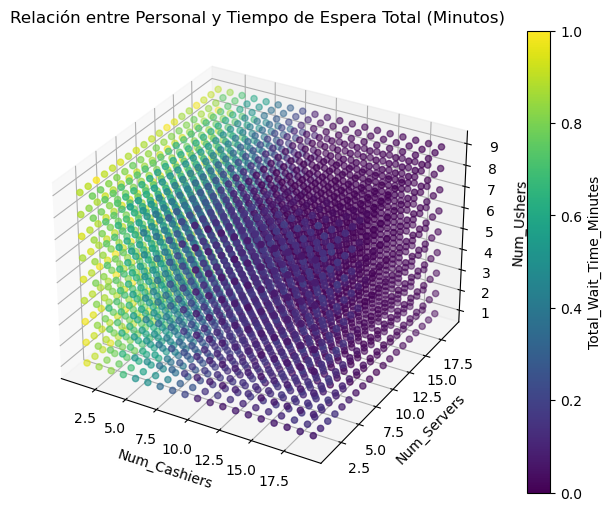

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Suponiendo que tienes un DataFrame llamado 'df' con las columnas mencionadas

# Crear una figura tridimensional
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Agregar los puntos de datos al gráfico tridimensional
ax.scatter(df['Num_Cashiers'], df['Num_Servers'], df['Num_Ushers'], c=df['Total_Wait_Time_Minutes'], cmap='viridis')

# Configurar etiquetas de ejes
ax.set_xlabel('Num_Cashiers')
ax.set_ylabel('Num_Servers')
ax.set_zlabel('Num_Ushers')

# Configurar título
ax.set_title('Relación entre Personal y Tiempo de Espera Total (Minutos)')

# Mostrar la barra de colores para Total_Wait_Time_Minutes
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Total_Wait_Time_Minutes')

# Mostrar el gráfico tridimensional
plt.show()



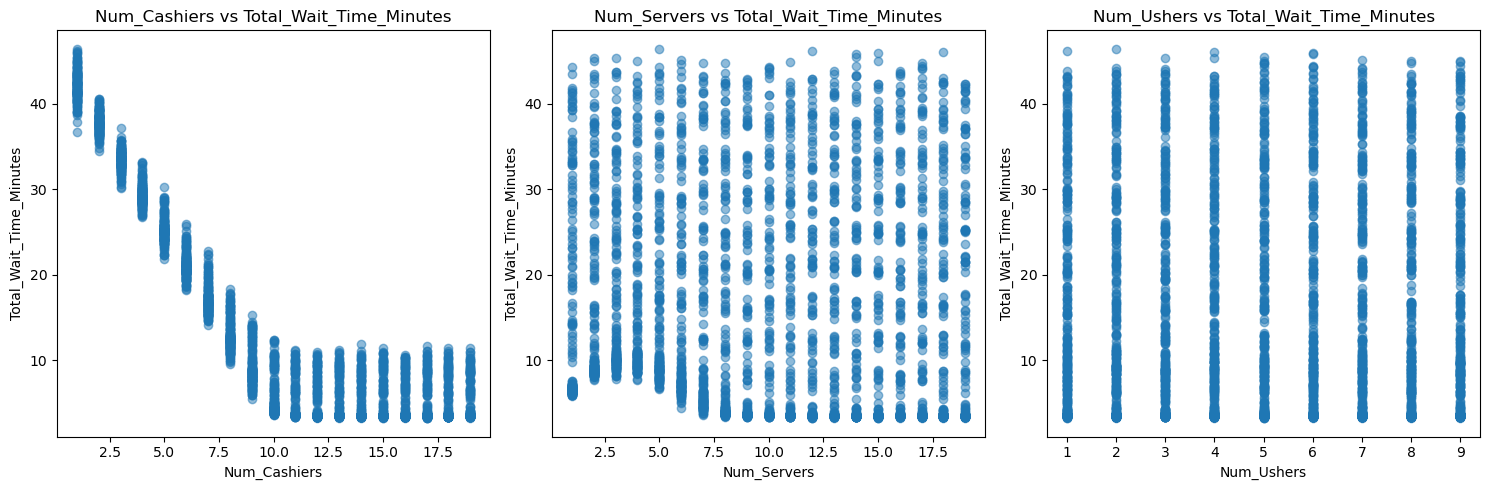

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado 'df' con las columnas mencionadas

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico de dispersión para Num_Cashiers vs Total_Wait_Time_Minutes
axes[0].scatter(df['Num_Cashiers'], df['Total_Wait_Time_Minutes'], alpha=0.5)
axes[0].set_xlabel('Num_Cashiers')
axes[0].set_ylabel('Total_Wait_Time_Minutes')
axes[0].set_title('Num_Cashiers vs Total_Wait_Time_Minutes')

# Gráfico de dispersión para Num_Servers vs Total_Wait_Time_Minutes
axes[1].scatter(df['Num_Servers'], df['Total_Wait_Time_Minutes'], alpha=0.5)
axes[1].set_xlabel('Num_Servers')
axes[1].set_ylabel('Total_Wait_Time_Minutes')
axes[1].set_title('Num_Servers vs Total_Wait_Time_Minutes')

# Gráfico de dispersión para Num_Ushers vs Total_Wait_Time_Minutes
axes[2].scatter(df['Num_Ushers'], df['Total_Wait_Time_Minutes'], alpha=0.5)
axes[2].set_xlabel('Num_Ushers')
axes[2].set_ylabel('Total_Wait_Time_Minutes')
axes[2].set_title('Num_Ushers vs Total_Wait_Time_Minutes')

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()
